In [3]:
!pip install mllibs

^C


In [2]:
print("djfhk")

djfhk


In [5]:
# load the dataset
import pandas as pd
df = pd.read_csv('D:/bharatintern/housepriceprediction/housing.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20637 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20429 non-null  float64
 5   population          20628 non-null  float64
 6   households          20630 non-null  float64
 7   median_income       20631 non-null  float64
 8   median_house_value  20632 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [8]:
# Let's show all columns with missing data as well:
df[df.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0
532,-122.27,37.78,52.0,1408.0,NaN,718.0,265.0,2.6806,207900.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0
...,...,...,...,...,...,...,...,...,...
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0


In [9]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_knn(df):
    
    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

    for col in cols_nan:                
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_putaside],axis=1)

c:\Users\addep\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
import numpy as np# Call function that imputes missing data
df2 = impute_knn(df)
# looks like we have a full feature matrix
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
from sklearn.model_selection import train_test_split

trdata,tedata = train_test_split(df2,test_size=0.3,random_state=43)

EXPLORATORY DATA ANALYSIS

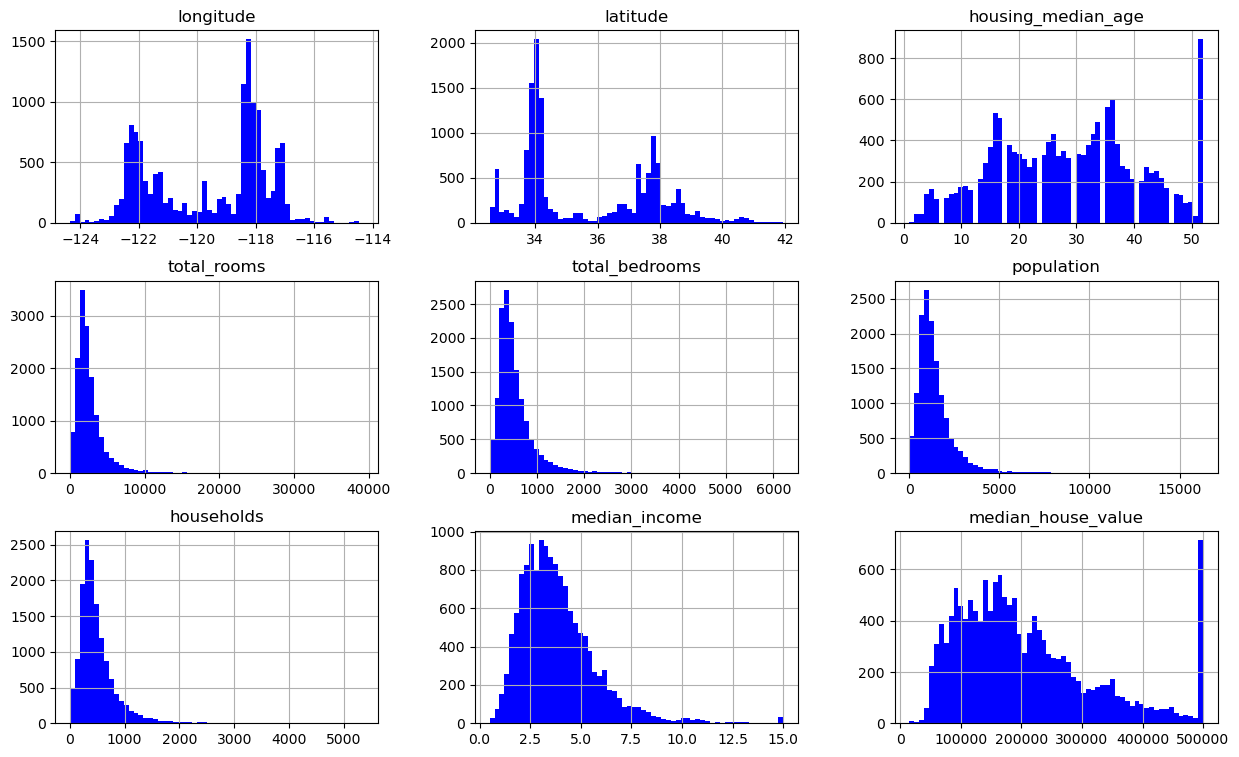

In [21]:
import matplotlib.pyplot as plt
color1 = 'blue'

trdata.hist(bins=60, figsize=(15,9),color=color1);
plt.show()

In [23]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  

In [24]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()

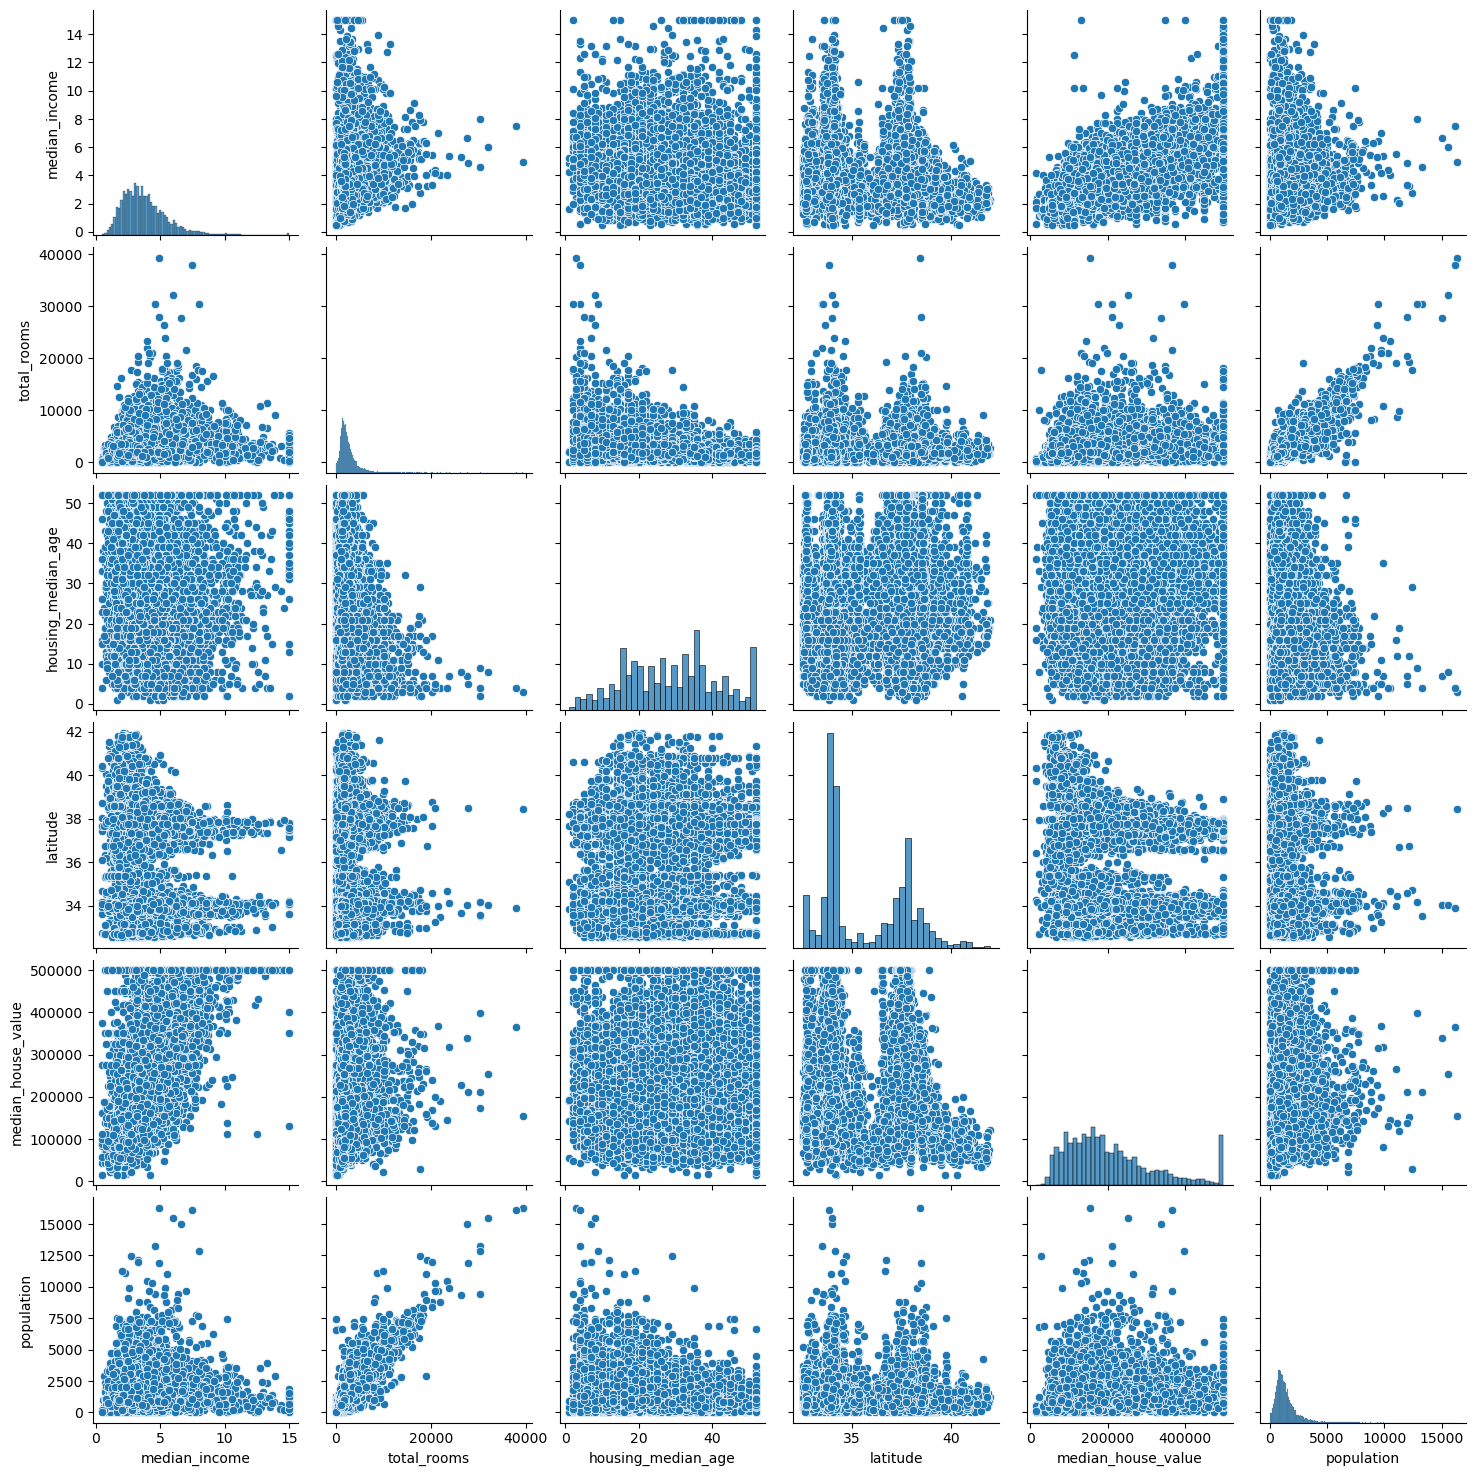

In [26]:
import seaborn as sns

tlist = ['median_income', 'total_rooms', 'housing_median_age', 'latitude', 'median_house_value', 'population']
sns.pairplot(trdata[tlist])


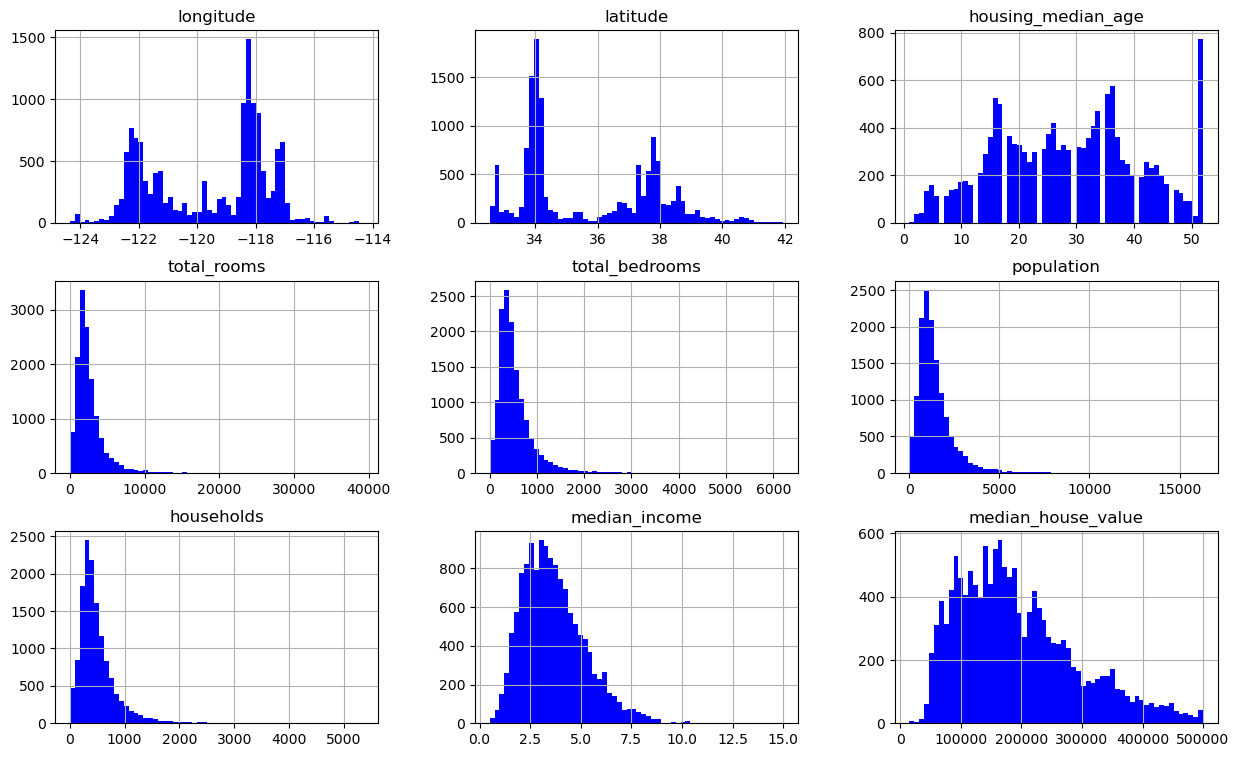

In [27]:
# trdata_upd : training data w/ removed outliers
maxval2 = trdata['median_house_value'].max() # get the maximum value
trdata_upd = trdata[trdata['median_house_value'] != maxval2] 
tedata_upd = tedata[tedata['median_house_value'] != maxval2]
trdata_upd.hist(bins=60, figsize=(15,9),color=color1);plt.show() # looks like its completely removed.

In [29]:
''' Draw a a single Heatmap using Seaborn '''
def heatmap1(values,xlabel,ylabel,xticklabels,yticklabels,
            cmap='plasma',vmin=None,vmax=None,fmt="%0.2f"):

    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(values, ax=ax,cmap=cmap)
    
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + 0.5)
    ax.set_yticks(np.arange(len(yticklabels)) + 0.5)
    ax.set_xticklabels(xticklabels);ax.set_yticklabels(yticklabels)
    ax.set_title('BR()')
    ax.set_aspect(1)
    
    for p, color, value in zip(img.get_paths(), img.get_facecolors(),img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")

In [45]:
# Model Evaluation w/ Cross Validation
def modelEval(ldf,feature='median_house_value',model_id = 'dummy'):
    
    # Input: Feature & Target DataFrame

    # Split feature/target variable
    y = ldf[feature].copy()
    X = ldf.copy()
    del X[feature]     # remove target variable
    
    # Pick Model 
    if(model_id is 'dummy'):    model = DummyRegressor()
    if(model_id is 'br'):    model = BR(verbose=False)  
    if(model_id is 'rf'):    model = RandomForestRegressor(n_estimators=10,random_state=10)
    
    ''' Parameter Based Cross Validation (No Pipeline)'''

    
    ''' Standard Cross Validation '''
    cv_score = np.sqrt(-cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error'))
    print("Scores:",cv_score)
    print("Mean:", cv_score.mean())
    print("std:", cv_score.std())

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\addep\AppData\Local\Temp\ipykernel_23320\3964645876.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'dummy'):    model = DummyRegressor()
C:\Users\addep\AppData\Local\Temp\ipykernel_23320\3964645876.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'br'):    model = BR(verbose=False)
C:\Users\addep\AppData\Local\Temp\ipykernel_23320\3964645876.py:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(model_id is 'rf'):    model = RandomForestRegressor(n_estimators=10,random_state=10)


In [42]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

# A simple comparison model
modelEval(trdata,model_id='dummy')